<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-исследование-данных." data-toc-modified-id="Загрузка-и-исследование-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и исследование данных.</a></span></li><li><span><a href="#Создание-выборок-из-базы-данных-и-тренировочного-набора." data-toc-modified-id="Создание-выборок-из-базы-данных-и-тренировочного-набора.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание выборок из базы данных и тренировочного набора.</a></span></li><li><span><a href="#Решение-с-использованием-библиотеки-scikit-learn." data-toc-modified-id="Решение-с-использованием-библиотеки-scikit-learn.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Решение с использованием библиотеки scikit-learn.</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Стандартизация данных</a></span></li><li><span><a href="#Кластеризация-базы-данных" data-toc-modified-id="Кластеризация-базы-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Кластеризация базы данных</a></span></li><li><span><a href="#Обучение-моделей-поиска-&quot;ближайших-соседей&quot;-для-каждого-кластера." data-toc-modified-id="Обучение-моделей-поиска-&quot;ближайших-соседей&quot;-для-каждого-кластера.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей поиска "ближайших соседей" для каждого кластера.</a></span></li></ul></li><li><span><a href="#Решение-с-использованием-библиотеки-FAISS." data-toc-modified-id="Решение-с-использованием-библиотеки-FAISS.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Решение с использованием библиотеки FAISS.</a></span><ul class="toc-item"><li><span><a href="#FAISS-с-параметрами-решения,-осуществленного-с-помощью-библиотеки-sklearn." data-toc-modified-id="FAISS-с-параметрами-решения,-осуществленного-с-помощью-библиотеки-sklearn.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>FAISS с параметрами решения, осуществленного с помощью библиотеки <code>sklearn</code>.</a></span></li><li><span><a href="#Изменение-количества-кластеров." data-toc-modified-id="Изменение-количества-кластеров.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изменение количества кластеров.</a></span></li><li><span><a href="#Изменение-метода-масштабирования-данных." data-toc-modified-id="Изменение-метода-масштабирования-данных.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Изменение метода масштабирования данных.</a></span></li></ul></li><li><span><a href="#Реализация-и-оптимизация-алгоритма-в-FAISS-на-полном-наборе-данных." data-toc-modified-id="Реализация-и-оптимизация-алгоритма-в-FAISS-на-полном-наборе-данных.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Реализация и оптимизация алгоритма в FAISS на полном наборе данных.</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Стандартизация данных</a></span></li><li><span><a href="#IVF-Flat" data-toc-modified-id="IVF-Flat-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>IVF Flat</a></span></li><li><span><a href="#IVF-Flat-с-квантизатором-HNSW" data-toc-modified-id="IVF-Flat-с-квантизатором-HNSW-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>IVF Flat с квантизатором HNSW</a></span></li><li><span><a href="#IVF-Flat-с-квантизатором-PQ" data-toc-modified-id="IVF-Flat-с-квантизатором-PQ-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>IVF Flat с квантизатором PQ</a></span></li><li><span><a href="#Выбор-лучшей-модели." data-toc-modified-id="Выбор-лучшей-модели.-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Выбор лучшей модели.</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели." data-toc-modified-id="Тестирование-лучшей-модели.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование лучшей модели.</a></span></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

# Сопоставление товаров на маркетплейсе

В рамках данного проекта решается задача сопоставления или "мэтчинга" товаров на крупном маркетплейсе.

Основная цель проекта — создание эффективного алгоритма сопоставления товаров, который сможет предложить наиболее подходящие варианты товаров из базы данных для каждого товара из выборки. Оценка качества алгоритма будет производиться с использованием метрики accuracy@5.

**Описание данных:**

Данные, предоставленные для анализа состоят из 4 наборов:

* `base.csv` - база данных - анонимизированный набор товаров. Каждый товар представлен как уникальный id и вектор признаков размерностью 72.

* `train.csv` - обучающий датасет. Каждая строчка - один товар, для которого известен уникальный id, вектор признаков и id товара из базы данных, который максимально похож на него (по мнению экспертов).

* `validation.csv` - выборка - датасет с товарами, для которых надо найти наиболее близкие товары из базы данных.

* `validation_answer.csv` - правильные ответы к выбоке.

**Краткий план работы:**

1. Загрузка и исследование данных.
2. Выделение выборок из базы данных и тренировочного набора.
2. Решение с использованием библиотеки `sklearn` на выборках.
3. Решение с использованием библиотеки `FAISS` на выборках.
3. Реализация и оптимизация алгоритма в `FAISS` на полном наборе данных.
5. Тестирование лучшей модели.

автор: Лукашина Вера Владимировна

e-mail: daimy6885@gmail.com, daimy6885@yandex.ru

телеграмм: @Vera_Luka

## Загрузка и исследование данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import timeit

import faiss

from sklearn.preprocessing import(
    StandardScaler,
    RobustScaler
)
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score

import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams["figure.figsize"] = (10, 8)
warnings.filterwarnings('ignore')

In [3]:
RANDOM_STATE = 12345

Откроем файлы и выведем на экран первые 5 строк каждой таблицы.

In [4]:
data_base = pd.read_csv('data/base.csv', index_col=0)
data_base.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-base,-115.08,11.15,-64.43,-118.88,216.48,-104.70,-469.07,44.35,120.92,181.45,-124.06,-32.46,-57.42,36.21,182.72,-28.07,-5.21,-1.73,-91.09,-79.47,-103.94,"1,507.23",-32.59,51.41,-51.91,813.77,-41.56,8.42,-129.98,148.77,-10.07,-143.01,79.85,-537.18,2.77,111.52,4.26,-153.34,-123.63,-39.71,-12.77,-4.17,-152.97,75.91,-57.47,17.27,-98.87,-138.07,91.00,-170.70,-50.02,59.79,78.11,-89.38,89.41,79.81,-129.51,-44.66,-80.44,5.15,-64.52,-138.78,-42.81,38.80,-151.76,-74.39,63.67,-4.70,92.93,115.27,-112.76,-60.83
1-base,-34.56,13.33,-69.79,-166.53,57.68,-86.10,-85.08,-35.64,119.72,195.23,-141.30,-126.77,-68.85,8.31,143.08,8.78,15.16,48.25,-244.95,-80.28,-81.79,429.88,-5.94,70.14,66.58,813.77,3.21,17.16,-39.42,148.16,-7.58,-174.37,101.22,-303.94,16.91,53.39,33.45,-148.55,-110.34,-33.28,-8.69,13.65,-91.23,38.45,-31.95,62.48,-166.47,-189.01,-56.73,-30.03,59.17,-56.71,63.54,-121.32,97.43,74.83,-138.78,58.89,-71.60,-251.95,11.39,-148.57,-117.77,41.10,-157.83,-94.45,68.20,24.35,179.94,116.83,-84.89,-59.52
2-base,-54.23,6.38,-29.21,-133.41,150.90,-99.44,52.55,62.38,128.95,164.38,-140.82,-22.49,-51.67,2.52,140.59,-22.04,-7.13,-5.18,-111.71,-79.03,-82.45,"1,507.23",-0.42,84.11,63.34,813.77,-105.21,18.84,-94.79,151.39,-21.48,-144.85,48.50,-780.45,64.77,79.78,-13.39,-150.06,-118.76,-40.90,-15.22,-1.86,-93.82,98.75,-46.75,65.93,-10.29,-125.32,21.05,-22.64,68.92,-54.90,66.34,-142.93,83.03,69.98,-123.73,65.32,-114.04,-529.40,-101.58,-134.66,-76.40,46.01,-207.14,127.33,65.57,66.33,81.07,116.59,"-1,074.46",-32.53
3-base,-87.52,4.04,-87.80,-185.07,76.37,-58.99,-383.18,-33.61,122.03,136.23,-108.47,-104.54,-82.39,-79.99,113.60,-39.00,-4.79,8.33,-124.86,-79.11,-107.94,"1,479.17",-125.27,24.66,-16.92,813.77,-182.68,14.72,-62.93,151.20,10.61,-134.93,58.78,-529.30,43.67,92.81,-38.94,-145.05,-124.30,-36.88,-17.74,10.54,-124.58,121.91,-17.32,105.22,-94.38,-63.77,29.22,-26.42,5.87,64.06,63.51,-112.26,80.93,72.64,-137.31,7.91,-62.19,-540.32,-89.59,-149.33,-70.65,-6.36,-147.20,-37.69,66.20,-20.57,137.21,117.47,"-1,074.46",-72.92
4-base,-72.74,6.52,43.67,-140.61,5.82,-112.07,-397.71,45.18,122.17,112.12,-110.34,-38.98,-50.23,-26.69,135.27,-7.51,8.92,111.58,-130.83,-79.32,-57.84,"1,262.92",19.23,59.81,76.16,312.70,-76.73,21.30,-24.07,167.39,-44.06,-148.13,98.04,-657.52,96.36,71.06,-36.56,-135.37,-123.71,-44.74,-10.86,8.35,-168.33,215.93,-32.98,66.86,30.84,-211.54,57.70,-67.82,-29.39,-34.12,54.71,-26.03,90.67,58.09,-134.78,77.62,-176.62,-529.76,-100.57,-125.32,-57.20,56.64,-159.35,85.94,66.77,-2.51,65.32,135.05,"-1,074.46",0.32


In [5]:
data_train = pd.read_csv('data/train.csv', index_col=0)
data_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,Target
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-query,-53.88,17.97,-42.12,-183.94,187.52,-87.14,-347.36,38.31,109.09,30.41,-88.08,-52.70,-27.69,4.87,198.35,-30.08,-3.80,-135.81,-161.84,-78.51,-94.43,898.44,-70.14,78.42,108.03,813.77,-74.79,12.61,-183.82,149.72,-27.04,-133.21,106.42,-303.94,48.73,58.19,24.25,-151.22,-104.28,-34.49,-12.59,2.62,-120.97,149.99,-31.95,82.31,-115.83,-243.31,6.62,-132.20,68.71,-38.81,62.94,-132.65,89.19,87.04,-121.28,-6.99,-206.51,29.49,-77.03,-132.39,-105.43,70.11,-155.80,-101.97,65.90,34.46,62.64,134.76,-415.75,-25.96,675816-base
1-query,-87.78,6.81,-32.05,-177.26,120.80,-83.81,-94.57,-78.43,124.92,140.33,-177.61,-85.00,42.81,-57.26,96.79,-19.26,0.74,50.62,-155.27,-78.66,-92.76,353.16,-34.74,82.49,-28.45,813.77,-137.53,26.60,-136.78,153.36,48.81,-115.92,87.46,-222.29,25.12,91.89,-30.64,-136.59,-140.50,-43.45,-7.23,8.27,-117.92,149.15,-18.75,95.32,-60.09,-83.82,37.45,-23.30,74.06,-7.14,75.86,-112.05,82.86,54.07,-134.01,-26.14,-214.63,-457.85,21.46,-137.41,-40.81,4.67,-151.70,-1.64,68.17,25.10,89.97,130.59,"-1,035.09",-51.28,366656-base
2-query,-49.98,3.84,-116.12,-180.40,190.13,-50.84,26.94,-30.45,125.77,211.61,-86.35,-35.67,16.40,-80.80,137.91,-23.53,-47.26,-16.65,-194.51,-78.37,-69.32,"1,507.23",-52.50,-34.17,52.96,813.77,-18.02,20.95,-50.32,158.76,0.18,-183.07,99.05,"-1,018.47",-51.80,97.77,-10.87,-144.42,-133.82,-78.90,-17.20,4.47,-63.97,154.64,-30.21,48.53,-122.41,-112.71,53.46,-31.12,107.84,16.48,77.93,-95.62,91.46,63.12,-126.94,8.07,-195.68,-163.12,-72.83,-139.22,-52.03,78.04,-169.15,82.14,66.01,18.40,212.41,121.93,"-1,074.46",-22.55,1447819-base
3-query,-47.81,9.09,-115.40,-121.01,94.65,-109.26,-775.15,79.19,124.00,242.65,-146.52,-159.47,-13.84,-6.11,118.94,-44.59,9.56,14.44,-156.91,-78.79,-78.74,"1,507.23",19.96,34.83,-8.82,813.77,-125.61,17.58,-58.45,141.28,-54.96,-136.99,63.88,"-1,018.47",89.23,65.92,-24.08,-152.33,-91.20,-28.23,-4.77,0.16,-129.13,122.96,-30.80,123.62,-37.54,-72.14,71.24,-168.12,118.24,-18.07,37.26,-137.69,87.50,62.44,-131.26,35.69,-86.04,-379.34,-153.47,-131.20,-61.57,44.52,-145.42,93.99,64.13,106.06,83.18,118.28,"-1,074.46",-19.90,1472602-base
4-query,-79.63,14.44,-58.90,-147.05,57.13,-16.24,-321.32,45.98,125.94,103.39,-107.15,-8.80,-50.98,29.46,143.39,5.61,-45.27,9.64,-77.55,-79.07,-77.93,"1,507.23",16.61,116.28,33.75,813.77,-105.77,6.52,-19.81,157.69,-20.60,-146.59,78.85,-780.45,87.56,73.04,16.89,-144.66,-116.12,-19.35,-7.71,-5.39,-140.25,193.18,-53.15,79.87,-151.13,-45.06,79.80,46.76,47.68,-24.10,75.14,-207.35,93.44,51.51,-135.48,99.80,-49.16,-203.21,-127.75,-103.34,-68.77,45.03,-196.09,-117.63,66.93,42.46,77.62,92.48,"-1,074.46",-21.15,717819-base


Исправим стилевую ошибку в названии целевого признака.

In [6]:
data_train.columns = data_train.columns.str.lower()
data_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,target
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-query,-53.88,17.97,-42.12,-183.94,187.52,-87.14,-347.36,38.31,109.09,30.41,-88.08,-52.70,-27.69,4.87,198.35,-30.08,-3.80,-135.81,-161.84,-78.51,-94.43,898.44,-70.14,78.42,108.03,813.77,-74.79,12.61,-183.82,149.72,-27.04,-133.21,106.42,-303.94,48.73,58.19,24.25,-151.22,-104.28,-34.49,-12.59,2.62,-120.97,149.99,-31.95,82.31,-115.83,-243.31,6.62,-132.20,68.71,-38.81,62.94,-132.65,89.19,87.04,-121.28,-6.99,-206.51,29.49,-77.03,-132.39,-105.43,70.11,-155.80,-101.97,65.90,34.46,62.64,134.76,-415.75,-25.96,675816-base
1-query,-87.78,6.81,-32.05,-177.26,120.80,-83.81,-94.57,-78.43,124.92,140.33,-177.61,-85.00,42.81,-57.26,96.79,-19.26,0.74,50.62,-155.27,-78.66,-92.76,353.16,-34.74,82.49,-28.45,813.77,-137.53,26.60,-136.78,153.36,48.81,-115.92,87.46,-222.29,25.12,91.89,-30.64,-136.59,-140.50,-43.45,-7.23,8.27,-117.92,149.15,-18.75,95.32,-60.09,-83.82,37.45,-23.30,74.06,-7.14,75.86,-112.05,82.86,54.07,-134.01,-26.14,-214.63,-457.85,21.46,-137.41,-40.81,4.67,-151.70,-1.64,68.17,25.10,89.97,130.59,"-1,035.09",-51.28,366656-base
2-query,-49.98,3.84,-116.12,-180.40,190.13,-50.84,26.94,-30.45,125.77,211.61,-86.35,-35.67,16.40,-80.80,137.91,-23.53,-47.26,-16.65,-194.51,-78.37,-69.32,"1,507.23",-52.50,-34.17,52.96,813.77,-18.02,20.95,-50.32,158.76,0.18,-183.07,99.05,"-1,018.47",-51.80,97.77,-10.87,-144.42,-133.82,-78.90,-17.20,4.47,-63.97,154.64,-30.21,48.53,-122.41,-112.71,53.46,-31.12,107.84,16.48,77.93,-95.62,91.46,63.12,-126.94,8.07,-195.68,-163.12,-72.83,-139.22,-52.03,78.04,-169.15,82.14,66.01,18.40,212.41,121.93,"-1,074.46",-22.55,1447819-base
3-query,-47.81,9.09,-115.40,-121.01,94.65,-109.26,-775.15,79.19,124.00,242.65,-146.52,-159.47,-13.84,-6.11,118.94,-44.59,9.56,14.44,-156.91,-78.79,-78.74,"1,507.23",19.96,34.83,-8.82,813.77,-125.61,17.58,-58.45,141.28,-54.96,-136.99,63.88,"-1,018.47",89.23,65.92,-24.08,-152.33,-91.20,-28.23,-4.77,0.16,-129.13,122.96,-30.80,123.62,-37.54,-72.14,71.24,-168.12,118.24,-18.07,37.26,-137.69,87.50,62.44,-131.26,35.69,-86.04,-379.34,-153.47,-131.20,-61.57,44.52,-145.42,93.99,64.13,106.06,83.18,118.28,"-1,074.46",-19.90,1472602-base
4-query,-79.63,14.44,-58.90,-147.05,57.13,-16.24,-321.32,45.98,125.94,103.39,-107.15,-8.80,-50.98,29.46,143.39,5.61,-45.27,9.64,-77.55,-79.07,-77.93,"1,507.23",16.61,116.28,33.75,813.77,-105.77,6.52,-19.81,157.69,-20.60,-146.59,78.85,-780.45,87.56,73.04,16.89,-144.66,-116.12,-19.35,-7.71,-5.39,-140.25,193.18,-53.15,79.87,-151.13,-45.06,79.80,46.76,47.68,-24.10,75.14,-207.35,93.44,51.51,-135.48,99.80,-49.16,-203.21,-127.75,-103.34,-68.77,45.03,-196.09,-117.63,66.93,42.46,77.62,92.48,"-1,074.46",-21.15,717819-base


In [7]:
data_valid = pd.read_csv('data/validation.csv', index_col=0)
data_valid.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100000-query,-57.37,3.60,-13.21,-125.93,110.75,-81.28,-461.00,139.82,112.88,75.22,-131.89,-140.97,-57.99,-22.87,150.90,7.97,17.62,-34.87,-216.14,-80.91,-52.58,263.36,56.27,66.92,21.61,813.77,-32.78,20.79,-79.78,156.31,-42.83,-71.72,83.28,-304.17,1.61,55.83,-29.47,-139.16,-126.04,-62.64,-5.01,11.98,-43.08,190.12,-25.00,76.15,-245.26,-143.66,-4.26,-46.66,-27.09,-34.35,75.53,-47.17,92.70,60.48,-127.49,-39.48,-124.38,-307.95,45.51,-144.19,-75.51,52.83,-143.44,59.05,69.28,61.93,111.59,115.14,"-1,099.13",-117.08
100001-query,-53.76,12.79,-43.27,-134.42,114.45,-90.52,-759.63,64.00,127.12,53.13,-153.72,-63.95,-52.37,-33.39,148.62,-22.48,15.16,-56.20,-153.61,-79.83,-101.06,"1,203.54",81.60,101.02,56.78,92.21,-126.86,10.38,-38.52,165.38,-77.84,-169.54,103.48,-915.74,16.11,14.67,-38.71,-149.54,-138.79,-36.08,-2.78,2.28,-142.48,189.95,-18.41,90.52,-95.53,-259.64,52.44,-30.00,14.50,-1.07,66.84,-161.28,94.79,50.42,-125.08,-25.17,-176.18,-655.84,-99.24,-141.54,-79.44,29.19,-168.61,-82.87,70.77,-65.98,97.08,123.39,-744.44,-25.01
100002-query,-64.18,-3.98,-7.68,-170.16,96.45,-62.38,-759.63,87.48,131.27,168.92,-220.31,-31.38,-8.79,2.29,133.27,-41.31,14.31,-18.23,-205.53,-78.16,-96.61,"1,507.23",-5.96,34.94,-56.09,813.77,-13.20,18.97,-35.11,151.37,-17.49,-145.88,15.53,-655.40,39.41,62.55,9.92,-143.93,-123.11,-37.03,-13.50,12.91,-116.04,176.28,-45.91,103.49,-90.66,-162.62,117.13,13.08,69.83,-6.87,63.71,-123.85,91.61,59.76,-129.57,-12.82,-154.20,-407.20,5.52,-126.81,-134.80,37.37,-159.66,-119.23,67.71,86.00,137.64,141.08,-294.05,-70.97
100003-query,-99.29,16.12,9.84,-148.06,83.70,-133.73,58.58,-19.05,115.04,75.21,-114.27,-71.41,-65.35,24.38,50.47,-14.72,15.07,-46.68,-176.60,-78.69,-139.23,325.55,3.63,74.93,-4.80,813.77,-52.98,15.64,-54.09,151.31,21.09,-134.51,65.12,-529.30,131.57,67.64,-22.88,-145.91,-86.92,-11.86,-22.19,0.46,-212.53,170.52,-48.09,99.71,-194.69,-141.52,60.22,73.39,118.57,58.90,55.57,-181.09,83.34,66.08,-114.05,-57.16,-56.34,-318.68,-15.98,-128.10,-77.24,44.10,-132.53,-106.32,70.88,23.58,133.18,143.25,-799.36,-89.39
100004-query,-79.53,-0.36,-16.03,-170.88,165.45,-28.29,33.93,34.41,128.90,102.09,-76.21,-26.39,34.42,50.94,157.68,-23.79,-33.18,-0.59,-193.32,-79.65,-91.89,"1,358.48",44.03,121.53,46.18,433.62,-82.23,21.07,-32.94,149.27,0.40,-97.67,81.72,-825.64,9.40,49.36,17.73,-160.17,-129.37,-55.53,-2.60,-0.23,-41.37,92.09,-58.63,73.66,-10.26,-175.66,25.40,47.87,51.46,140.95,58.75,-215.49,91.26,44.17,-135.30,-19.51,-106.67,-127.98,-11.43,-135.57,-123.77,45.64,-134.26,13.74,70.62,15.33,154.57,101.70,"-1,171.89",-125.31


In [8]:
data_valid_answer = pd.read_csv('data/validation_answer.csv')
data_valid_answer.head()

,Id,Expected
0,100000-query,2676668-base
1,100001-query,91606-base
2,100002-query,472256-base
3,100003-query,3168654-base
4,100004-query,75484-base


Исправим стилевую ошибку в названии столбца.

In [9]:
data_valid_answer.columns = data_valid_answer.columns.str.lower()
data_valid_answer.head()

,id,expected
0,100000-query,2676668-base
1,100001-query,91606-base
2,100002-query,472256-base
3,100003-query,3168654-base
4,100004-query,75484-base


Определим размер каждой из выборок.

In [10]:
print(f'Размер базы данных {data_base.shape}')
print(f'Размер обучающей выборки {data_train.shape}')      
print(f'Размер вылидационной выбрки {data_valid.shape}')      
print(f'Размер выборки с правильными ответами {data_valid_answer.shape}')      

Размер базы данных (2918139, 72)
Размер обучающей выборки (100000, 73)
Размер вылидационной выбрки (100000, 72)
Размер выборки с правильными ответами (100000, 2)


Исследуем датафрейм База данных на наличие полных дубликатов и пропусков.

In [11]:
data_base.duplicated().sum()

0

In [12]:
data_base.isna().mean()[data_base.isna().mean() > 0]

Series([], dtype: float64)

В базе данных дубликатов и пропусков не обнаружено.

Проведем сравнительный анализ обучающей и валидационной выборок с помощью библиотеки `Sweetviz`

In [13]:
# report = sv.compare([data_train, 'Train Data'],[data_valid, 'Valid Data'])

In [14]:
# report.show_notebook(scale=0.9)

**Выводы:**

* Данные, представленные для анализа, состоят из 4 наборов: база данных, обучающая выборка, валидационная выборка и ответы к валидационной выборке.

* База данных — это перечень товаров и их характеристик. Всего представлено 2918139 id, каждый из которых имеет 72 признака. Информации о смысловом содержании признаков нет.

* Обучающая и валидационная выборки состоят из 100000 наблюдений. Для каждого товара из этих выборок в базе данных имеется аналогичный, id которого указан в обучающей выборке.

* В базе данных, обучающей и валидационной выборках пропусков и полных дубликатов не обнаружено.

* Распределение значений признаков в обучающей и валидационной выборках идентичны.

* Равномерное распределение имеют признаки: 59 и 65. Признак 6 – равномерное распределение, но с 2 пиками слева, признак 70 – равномерное распределение с 1 пиком слева. Признаки 21 и 25 так же характеризуются равномерным распределением, но с тяжелым правым хвостом. 

* Признаки 21 и 25 представлены небольшим количеством уникальных значений: 21% и 15% соответственно.

* Признак 33 имеет только 2% уникальных значений и характеризуется ассиметричным распределением с несколькими пиками.

* Распределение значений признака 44 также является ассиметричным, имеет 2 ярко выраженных пика по краям. Признак содержит 11% уникальных значений в обучающей выборке и 10% в валидационной.

* Остальные признаки имеют нормальное распределение.


## Создание выборок из базы данных и тренировочного набора.

Сделаем выборки для ускорения работы моделей в процессе поиска оптимального решения задачи.

In [15]:
df_train = data_train.sample(n=2500, random_state=RANDOM_STATE)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,target
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
71751-query,-95.97,7.12,-38.49,-133.00,126.21,-58.90,-759.63,52.94,125.04,160.10,-189.44,-84.16,-63.69,2.72,107.72,-31.64,-19.80,61.03,-239.22,-79.09,-33.90,"1,507.23",27.70,90.78,31.54,-36.44,-185.76,12.08,-36.02,159.39,-15.99,-139.96,116.11,-640.75,34.61,74.65,-45.50,-160.13,-128.44,-18.84,-20.16,16.09,-59.24,96.06,-50.84,52.28,-152.85,-205.46,86.33,-101.83,159.54,-54.96,49.48,-134.72,91.42,44.83,-121.46,-73.15,-88.41,-560.36,-89.10,-127.40,-33.59,58.29,-124.60,14.94,65.00,-9.93,40.47,157.19,-337.91,-31.37,1986650-base
80493-query,-81.03,17.41,-47.94,-186.73,105.05,-75.71,-432.76,40.41,118.99,138.76,-129.69,-54.38,5.07,8.11,191.16,-27.46,-8.56,-127.00,-233.51,-77.64,-112.86,"1,507.23",-67.61,50.97,92.51,813.77,-112.51,13.72,-116.46,145.04,-40.33,-146.88,81.41,-156.25,65.29,49.08,1.58,-153.05,-99.13,-41.89,-13.90,5.22,-185.68,166.91,-45.86,86.29,-91.41,-115.62,24.33,-100.48,53.89,10.35,62.07,-196.17,88.60,88.09,-130.22,-4.40,-267.93,-437.25,-12.16,-124.61,-69.07,89.23,-183.34,48.68,65.68,45.70,35.66,123.79,-304.04,-31.16,574892-base
2655-query,-3.91,9.61,12.14,-155.24,193.74,-55.77,-759.63,94.52,124.00,308.74,-120.92,-43.44,-71.40,11.07,152.55,-22.82,20.89,-44.14,-96.73,-78.81,-68.12,"1,328.85",18.46,60.82,16.22,813.77,-124.99,27.80,-152.95,154.49,-7.31,-147.23,47.95,-406.54,-0.90,74.17,-28.39,-159.99,-134.23,-9.12,-18.52,7.27,-157.47,95.39,-24.21,32.86,-132.66,-21.32,63.47,-77.76,8.97,-21.11,67.92,-105.61,96.82,70.48,-131.81,68.82,-118.42,-208.80,-93.52,-131.31,-54.07,69.53,-156.27,100.13,67.22,-72.14,-23.85,135.36,-177.74,-67.12,257966-base
53233-query,-73.29,4.09,-45.91,-170.53,115.82,-76.80,-759.63,-50.22,132.57,171.58,-104.62,32.00,-50.27,-6.30,157.09,-17.36,-22.66,-94.63,-129.40,-78.95,-61.81,"1,507.23",21.72,68.73,32.75,813.77,-73.76,12.80,-139.20,157.69,-12.59,-180.39,123.86,-871.41,56.48,112.07,-20.02,-129.51,-125.76,-53.38,-9.10,0.73,-154.23,95.71,-26.34,2.76,-65.79,-169.83,45.00,45.01,76.57,25.90,50.96,-74.42,93.61,51.87,-134.18,78.40,-137.05,-507.46,-57.25,-134.61,-106.19,9.33,-98.96,-32.49,68.06,65.55,20.20,131.74,-711.27,-12.02,2005218-base
91141-query,-120.68,5.94,-51.50,-132.44,34.58,-83.84,-530.12,77.47,122.80,136.90,-153.36,-98.63,41.99,21.21,145.50,-32.82,-12.27,-20.29,-147.81,-79.78,-112.07,794.59,11.01,54.11,9.00,813.77,-194.49,9.33,-39.07,146.80,-10.76,-118.19,116.26,"-1,025.87",31.33,64.56,3.40,-156.39,-113.24,-8.83,-21.31,-0.16,-214.91,147.42,-37.06,63.93,-96.75,-108.31,8.98,-48.17,103.83,44.49,58.61,-70.36,87.32,73.89,-129.30,-70.02,-16.34,-120.40,-42.56,-113.18,-96.59,41.25,-186.03,-14.89,66.34,-1.21,104.58,126.53,-423.29,-60.06,1034391-base


In [16]:
selected_rows = data_base.loc[df_train['target']]
selected_rows.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1986650-base,-104.70,7.99,-26.03,-135.96,147.42,-54.09,-759.63,77.29,124.97,177.70,-190.64,-74.02,-68.89,-6.51,114.26,-26.94,-24.73,54.66,-234.15,-79.35,-33.72,"1,507.23",36.67,90.31,25.43,813.77,-169.01,12.96,-38.79,160.34,-21.23,-143.11,125.04,-902.40,42.67,74.24,-43.80,-160.07,-121.75,-15.49,-20.29,15.68,-70.48,107.83,-50.84,51.78,-180.19,-205.16,73.62,-86.22,166.17,-63.84,55.62,-125.81,91.63,44.41,-122.84,-66.46,-82.11,-530.23,-102.09,-129.47,-32.09,47.32,-136.21,-79.67,65.37,-21.09,51.42,157.50,-337.91,-26.56
574892-base,-85.19,10.13,-22.93,-174.66,57.05,-93.79,-432.76,135.71,116.19,98.20,-124.56,-107.53,-68.33,2.45,206.13,-45.08,-11.93,-64.69,-165.46,-77.02,-92.22,"1,507.23",-109.70,33.04,90.51,813.77,-125.01,16.32,-104.98,142.41,2.58,-175.81,104.12,"-1,018.47",65.66,64.30,-37.90,-154.94,-96.86,-12.98,0.08,9.22,-74.81,133.96,-45.86,37.45,-50.15,-116.76,58.54,-83.91,110.89,-33.78,77.20,-150.08,92.40,91.93,-132.34,-18.92,-270.31,-289.61,-113.36,-121.22,-65.77,62.68,-190.12,-80.68,65.86,37.10,2.61,109.71,-304.04,-26.45
257966-base,-3.91,9.61,12.14,-155.24,193.74,-55.77,-759.63,94.52,124.00,308.74,-120.92,-43.44,-71.40,11.07,152.55,-22.82,20.89,-44.14,-96.73,-78.81,-68.12,"1,328.85",18.46,60.82,16.22,813.77,-124.99,27.80,-152.95,154.49,-7.31,-147.23,47.95,-744.24,-0.90,74.17,-28.39,-159.99,-134.23,-9.12,-18.52,7.27,-157.47,95.39,-24.21,32.86,-132.66,-21.32,63.47,-77.76,8.97,-21.11,67.92,-105.61,96.82,70.48,-131.81,68.82,-118.42,-595.33,-93.52,-131.31,-54.07,69.53,-156.27,100.13,67.22,-72.14,-23.85,135.36,-177.74,-67.12
2005218-base,-73.28,4.09,-45.90,-170.53,115.81,-76.81,-759.63,-50.23,132.57,171.59,-104.62,32.00,-50.27,-6.31,157.10,-17.36,-22.66,-94.61,-129.40,-78.95,-61.82,"1,507.23",21.73,68.71,32.75,813.77,-73.75,12.80,-139.21,157.69,-12.58,-180.39,123.85,-432.58,56.47,112.08,-20.03,-129.51,-125.76,-53.38,-9.10,0.73,-154.22,95.73,-26.34,2.77,-65.79,-169.84,44.99,45.02,76.58,25.91,50.97,-74.43,93.61,51.87,-134.18,78.40,-137.04,-578.36,-57.25,-134.61,-106.19,9.33,-98.97,-32.49,68.06,65.53,20.19,131.73,-711.27,-12.01
1034391-base,-120.68,5.94,-51.50,-132.44,34.58,-83.84,-530.12,77.47,122.80,136.90,-153.36,-98.63,41.99,21.21,145.50,-32.82,-12.27,-20.29,-147.81,-79.78,-112.07,935.20,11.01,54.11,9.00,813.77,-194.49,9.33,-39.07,146.80,-10.76,-118.19,116.26,-225.52,31.33,64.56,3.40,-156.39,-113.24,-8.83,-21.31,-0.16,-214.91,147.42,-37.06,63.93,-96.75,-108.31,8.98,-48.17,103.83,44.49,58.61,-70.36,87.32,73.89,-129.30,-70.02,-16.34,-254.57,-42.56,-113.18,-96.59,41.25,-186.03,-14.89,66.34,-1.21,104.58,126.53,-423.29,-60.06


In [17]:
random_rows = data_base.sample(frac=.05, random_state=RANDOM_STATE)
random_rows.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2886210-base,-77.53,5.29,-58.13,-161.05,133.75,-103.30,-423.28,91.39,123.08,108.62,-210.56,-61.36,-116.66,-38.16,125.08,-35.32,18.76,7.73,-237.27,-79.11,-125.46,"1,507.23",46.29,18.88,-27.79,813.77,-78.08,6.69,-183.03,161.67,2.79,-109.08,95.05,-771.30,-58.65,100.15,-21.83,-126.75,-125.21,-52.94,-28.48,9.90,-85.56,113.06,-21.15,51.71,-62.31,-31.47,45.56,24.31,31.27,7.69,45.57,-98.52,88.92,42.21,-136.60,10.63,-147.33,-447.10,-51.68,-123.92,-86.90,14.13,-156.29,19.52,70.85,-46.52,168.69,117.73,-914.19,11.18
2696076-base,-80.85,8.93,-84.54,-165.75,112.22,-31.40,-759.63,76.97,123.70,159.91,-146.71,-67.95,30.38,32.17,95.89,-32.76,0.65,-51.14,-76.15,-79.95,-75.77,"1,258.54",-28.35,68.81,10.17,813.77,-132.44,15.95,-50.80,140.12,-46.40,-187.33,59.29,-381.01,58.67,111.97,-29.13,-138.70,-108.75,-35.48,-1.90,9.29,-70.12,128.21,-52.79,49.85,-166.40,-128.70,104.18,-32.14,18.76,-51.66,59.17,-155.35,82.23,64.09,-131.79,78.94,-35.59,-439.94,-27.06,-136.67,-37.87,29.59,-160.60,125.00,70.94,-33.21,81.14,87.36,"-1,240.47",-73.32
4518902-base,-77.76,4.95,-81.57,-148.19,119.12,-90.77,-232.32,66.54,118.70,121.15,-78.01,-66.46,-17.90,31.17,147.70,-21.02,40.59,-15.30,26.22,-80.93,-77.06,"1,507.23",-27.57,90.56,55.17,813.77,-93.90,18.94,-115.39,165.50,-31.77,-143.98,104.62,-481.59,-3.60,50.33,26.30,-123.62,-123.06,-82.76,-9.77,5.74,-108.54,126.10,-42.92,83.83,-112.54,-82.57,49.11,-9.35,66.39,-53.85,65.59,-146.34,83.53,74.82,-148.84,-5.37,-132.89,-76.64,12.82,-125.92,-75.05,37.71,-132.58,-85.88,69.82,44.73,27.26,140.74,"-1,074.46",-116.20
3586712-base,-100.50,12.00,-38.24,-128.81,115.81,-101.56,-759.63,83.20,138.72,65.63,-138.33,-56.78,67.05,-4.90,161.45,-14.94,-44.14,-73.84,-104.22,-80.03,-110.08,366.07,-6.18,46.86,95.42,813.77,-26.75,10.51,-109.02,142.91,-14.84,-129.94,107.76,-462.27,-3.85,60.34,-31.07,-140.11,-119.10,-5.58,-18.49,-5.11,-176.81,174.26,-61.44,98.80,-50.02,-103.58,84.72,-49.36,44.85,34.99,73.02,-142.76,89.33,93.77,-138.40,26.79,-47.98,-460.77,-176.26,-145.42,-90.85,-1.13,-164.16,49.99,66.89,-8.24,-21.29,146.88,"-1,074.46",-88.12
279819-base,-45.39,1.22,-49.02,-112.28,68.64,-57.43,-759.63,-4.06,122.33,182.44,-128.98,-106.57,-43.52,72.00,175.86,-19.43,-19.07,36.98,-157.85,-80.33,-84.96,"1,507.23",45.62,18.46,-0.97,813.77,-122.61,12.99,-92.46,168.40,-26.44,-158.31,80.83,-752.05,98.01,105.53,-3.89,-146.36,-125.19,-74.68,-5.02,-0.30,-182.93,90.76,-18.23,50.64,-122.48,-255.42,101.18,-46.10,-101.46,-81.34,70.02,-190.39,89.35,79.32,-129.98,-28.45,-189.51,-274.36,32.71,-130.80,-56.67,43.66,-176.39,2.34,71.24,-26.38,134.59,105.07,"-1,074.46",-25.51


In [18]:
frames = [selected_rows, random_rows]
df_base = pd.concat(frames)
df_base = df_base.sample(frac=1)
df_base.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2104502-base,-89.14,11.10,-58.09,-159.37,96.26,-111.76,-191.54,103.06,126.28,154.31,-123.43,-74.09,-16.33,-20.51,119.91,-21.72,3.61,-29.39,-168.53,-78.28,-82.84,577.10,-21.33,86.67,83.81,-47.64,-66.38,6.44,-105.78,155.60,24.78,-205.55,60.86,-772.57,112.18,93.37,14.11,-149.88,-126.74,-23.00,0.68,15.24,-38.05,135.50,-61.03,30.06,-238.61,-187.95,-27.11,21.64,-23.37,2.67,57.23,-77.91,91.23,85.26,-134.01,26.62,-116.66,-53.61,-93.44,-122.38,-116.24,25.07,-97.41,-93.76,68.29,-31.93,60.27,143.89,-384.49,-49.85
3101077-base,-73.26,1.95,-24.38,-140.01,81.51,-42.80,-118.17,54.88,125.47,5.57,-86.45,31.24,-68.87,12.59,103.19,-16.44,22.67,-10.69,-130.74,-78.45,-133.91,"1,054.21",8.76,120.96,57.07,813.77,-11.09,24.70,-44.25,145.24,-0.18,-154.85,112.32,-529.30,64.17,82.98,-10.85,-145.66,-120.86,-14.78,-7.81,-3.02,-125.09,214.09,-37.90,68.65,-51.42,-126.89,114.29,-136.58,74.57,-50.81,86.40,-134.55,87.76,68.23,-153.32,-9.95,-147.02,24.17,-45.98,-129.89,-89.41,29.14,-116.37,110.29,65.60,-7.12,76.79,94.31,"-1,074.46",-40.64
1362947-base,-125.97,0.26,9.91,-140.22,122.80,-75.04,-240.37,-60.10,112.54,89.35,-125.66,-57.32,-24.57,-56.11,153.31,-17.24,13.75,9.35,-150.89,-78.75,-93.85,"1,507.23",-9.16,82.26,8.22,813.77,-66.67,15.81,-122.95,136.74,-42.29,-121.73,93.43,"-1,017.36",13.94,69.84,36.21,-142.80,-125.93,-72.69,-7.83,-2.07,-165.11,133.26,-52.85,48.96,-109.65,-181.04,110.94,-101.71,-18.56,38.13,92.54,-91.97,87.84,72.87,-127.64,6.47,-76.97,-496.19,-213.70,-142.16,-54.30,64.45,-215.36,-107.41,65.25,32.97,-12.39,130.72,"-1,074.46",-58.07
1655540-base,-51.02,3.74,-39.40,-135.17,63.57,-97.25,-664.91,8.62,124.36,285.18,-190.95,-137.13,-80.36,33.93,176.08,-15.16,-0.07,-37.39,-130.34,-79.27,-147.66,"1,507.23",-17.78,43.38,102.14,813.77,9.39,11.74,-119.28,158.17,9.66,-106.42,62.15,-282.60,11.91,62.48,-14.02,-135.18,-139.82,-94.43,-19.64,-3.83,-83.51,182.83,-38.80,37.25,-27.05,-231.03,11.55,59.52,-54.12,-42.89,77.92,-191.42,77.65,68.05,-128.83,43.83,-46.61,1.88,-119.78,-129.06,-89.52,42.94,-151.05,107.06,65.36,51.27,-26.56,115.62,"-1,005.01",-32.86
578880-base,-97.58,-0.28,-33.40,-164.18,78.43,-46.68,-312.15,11.73,127.35,-6.03,-175.05,-33.78,-72.39,14.16,198.69,-47.68,-14.06,54.43,-198.95,-79.09,-78.27,745.21,19.05,26.28,9.42,21.72,-115.31,14.55,-109.10,145.46,8.85,-101.65,104.08,-907.95,-8.26,71.77,-3.37,-141.82,-126.16,-51.10,-9.57,4.19,-181.36,60.11,-18.48,79.16,-91.14,-268.86,68.81,-46.76,-8.45,39.81,62.71,-120.14,89.39,72.91,-129.36,16.81,-169.22,-21.30,-81.94,-129.48,-95.39,16.30,-159.57,169.33,70.53,51.65,131.52,138.91,-640.56,-109.38


In [19]:
df_base = df_base.drop_duplicates()
df_base.duplicated().sum()

0

In [20]:
print(f'Размер выборки из базы данных {df_base.shape}')
print(f'Размер выборки из обучающего набора {df_train.shape}')      

Размер выборки из базы данных (148275, 72)
Размер выборки из обучающего набора (2500, 73)


Проведем анализ распределения значений признаков в тренировочном наборе данных и выборке из него с помощью библиотеки `Sweetviz`

In [21]:
# report_sample = sv.compare([data_train, 'Train Data'],[df_train, 'Sample Train Data'])

In [22]:
# report_sample.show_notebook(scale=0.9)

Формы гистограмм признаков идентичны в обеих таблицах (полной `data_train` и выборке из нее `df_train`), то это может говорить о том, что случайная выборка хорошо отражает распределение признаков в исходной таблице.

## Решение с использованием библиотеки scikit-learn.

### Стандартизация данных

In [23]:
scaler_sample = StandardScaler()

In [24]:
df_base_scale = scaler_sample.fit_transform(df_base)

In [25]:
y = 'target'
x = df_base.columns

In [26]:
df_train_scale = scaler_sample.transform(df_train[x])

### Кластеризация базы данных

In [27]:
start_time = timeit.default_timer()
K = range(3, 16)

inertia_sample = []
davies_bouldin_sample = []

for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=5, random_state=RANDOM_STATE)
    cluster_labels = km.fit_predict(df_base_scale)
    davies_bouldin = davies_bouldin_score(df_base_scale, cluster_labels)
        
    inertia_sample.append(km.inertia_)
    davies_bouldin_sample.append(davies_bouldin)
    
    print(k, 'done')
        
k_search_time = timeit.default_timer() - start_time

3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done


In [28]:
k_search_time

72.17885770000001

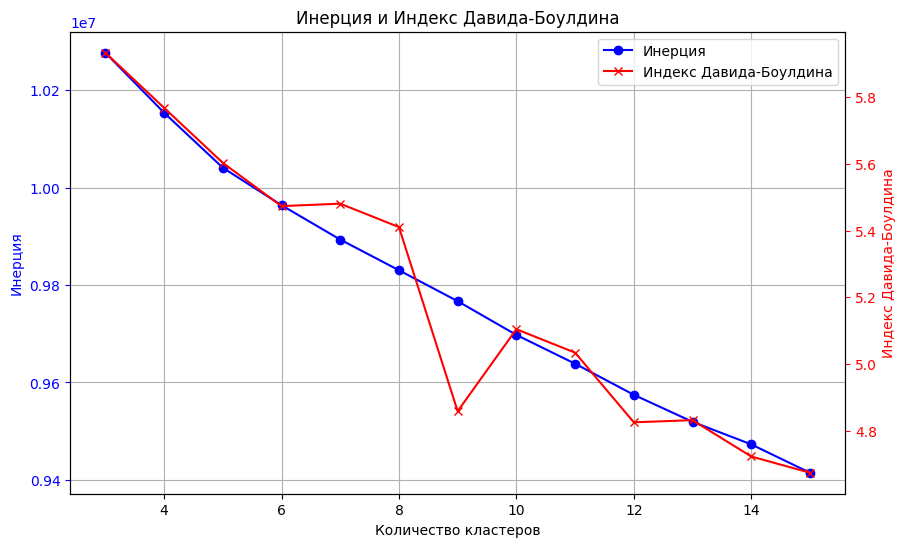

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Инерция
ax1.plot(K, inertia_sample, marker='o', color='b', label='Инерция')
ax1.set_xlabel('Количество кластеров')
ax1.set_ylabel('Инерция', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True)

# Индекс Давида-Боулдина
ax2 = ax1.twinx()
ax2.plot(K, davies_bouldin_sample, marker='x', color='r', label='Индекс Давида-Боулдина')
ax2.set_ylabel('Индекс Давида-Боулдина', color='r')
ax2.tick_params('y', colors='r')

# Добавляем легенду
# ax1.legend(loc='best')
# ax2.legend(loc='best')

# создание единой легенды для обеих осей y
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

plt.title('Инерция и Индекс Давида-Боулдина')
plt.legend(handles, labels, loc= 0)
plt.show()

Согласно графику, оптимальное число кластеров 9.

In [30]:
n_clusters=9
sample_clustering = KMeans(n_clusters=n_clusters, n_init=5, random_state=RANDOM_STATE)

start_time = timeit.default_timer()

sample_clustering.fit(df_base_scale)

clustering_fit_time = timeit.default_timer() - start_time
clustering_fit_time

5.666675800000007

In [31]:
start_time = timeit.default_timer()

df_base_scale_labels = sample_clustering.predict(df_base_scale)

clustering_predict_time_base = timeit.default_timer() - start_time
clustering_predict_time_base

0.10273499999999558

In [32]:
df_base_scale = pd.DataFrame(df_base_scale, index=df_base.index, columns=x)
df_base_scale['cluster'] = df_base_scale_labels
df_base_scale.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,cluster
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2104502-base,-0.12,0.61,-0.35,-0.64,-0.33,-1.41,0.74,1.28,0.41,0.46,0.47,-0.08,0.64,-0.77,-0.87,0.11,0.22,-0.19,-0.67,1.19,0.55,-1.71,-0.28,0.88,1.47,-3.79,-0.00,-2.12,-0.40,0.38,1.26,-1.76,-0.95,-0.83,1.90,0.86,1.18,-0.32,-0.63,0.99,1.24,1.92,1.31,0.31,-1.44,-0.91,-2.43,-0.86,-1.65,0.93,-0.85,0.47,-0.75,0.73,0.67,1.34,-0.14,0.27,0.05,1.24,-0.46,0.86,-1.22,-0.29,1.39,-1.09,0.27,-1.00,-0.24,1.33,1.07,-0.05,4
3101077-base,0.52,-1.24,0.52,0.33,-0.65,1.04,1.01,0.54,0.28,-1.85,1.36,1.98,-0.71,0.14,-1.36,0.51,1.13,0.16,0.14,0.97,-1.27,-0.52,0.30,1.88,0.78,0.42,0.90,1.80,0.87,-0.65,0.39,-0.30,0.89,0.10,0.70,0.37,0.21,0.10,-0.18,1.42,0.21,-1.21,-0.22,1.99,0.13,0.30,0.53,0.20,1.47,-1.79,0.82,-0.56,1.48,-0.30,-0.06,-0.08,-2.61,-0.45,-0.49,1.61,0.30,0.08,-0.34,-0.15,0.93,0.97,-1.20,-0.56,0.03,-1.00,-0.72,0.17,3
1362947-base,-1.60,-1.58,1.41,0.32,0.25,-0.11,0.56,-1.25,-1.75,-0.55,0.42,0.25,0.42,-1.74,0.13,0.45,0.71,0.54,-0.29,0.57,0.16,0.62,-0.05,0.75,-0.47,0.42,-0.01,-0.11,-0.75,-1.48,-1.06,0.65,0.22,-1.77,-0.56,-0.24,2.04,0.39,-0.57,-1.61,0.20,-1.05,-0.93,0.26,-0.88,-0.32,-0.39,-0.74,1.39,-1.19,-0.77,1.15,1.95,0.48,-0.04,0.31,0.67,-0.13,0.77,-0.86,-2.38,-1.20,0.81,1.08,-1.47,-1.23,-1.40,0.17,-1.42,0.71,-0.72,-0.25,3
1655540-base,1.41,-0.88,0.13,0.57,-1.03,-0.90,-1.00,-0.18,0.11,2.50,-1.15,-1.31,-1.00,0.72,0.81,0.61,0.05,-0.34,0.15,-0.11,-1.75,0.62,-0.21,-0.38,1.94,0.42,1.23,-0.98,-0.68,0.63,0.73,1.09,-0.90,1.04,-0.61,-0.59,0.09,1.15,-1.63,-2.74,-1.24,-1.35,0.51,1.32,0.07,-0.68,0.91,-1.60,-0.80,1.58,-1.37,-0.41,0.84,-1.35,-2.18,-0.10,0.52,0.60,1.32,1.50,-0.88,0.17,-0.34,0.33,0.09,0.94,-1.34,0.50,-1.65,0.00,-0.54,0.35,0
578880-base,-0.46,-1.69,0.29,-0.88,-0.71,0.90,0.30,-0.13,0.58,-2.03,-0.77,0.71,-0.80,0.18,1.48,-1.87,-0.62,1.38,-1.32,0.12,0.71,-1.29,0.50,-0.88,-0.44,-3.45,-0.79,-0.38,-0.47,-0.62,0.71,1.22,0.60,-1.35,-1.12,-0.15,0.50,0.48,-0.58,-0.48,-0.01,0.02,-1.21,-1.30,1.44,0.63,-0.10,-2.26,0.46,-0.25,-0.59,1.19,-0.33,-0.04,0.28,0.31,0.45,0.07,-0.90,1.39,-0.27,0.12,-0.54,-0.59,-0.12,1.57,1.50,0.51,0.92,1.10,0.41,-1.48,4


In [33]:
start_time = timeit.default_timer()

df_train_scale_labels = sample_clustering.predict(df_train_scale)

clustering_predict_time_train = timeit.default_timer() - start_time
clustering_predict_time_train

0.002148099999999431

In [34]:
df_train_scale = pd.DataFrame(df_train_scale, index=df_train.index, columns=x)
df_train_scale['cluster'] = df_train_scale_labels
df_train_scale.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,cluster
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
71751-query,-0.39,-0.19,0.16,0.68,0.32,0.47,-1.35,0.51,0.22,0.55,-1.12,-0.28,-0.58,-0.13,-1.23,-0.65,-0.90,1.51,-2.19,0.13,2.28,0.62,0.66,1.00,0.13,-3.73,-1.93,-0.91,1.04,0.75,-0.15,0.12,1.03,-0.33,-0.04,-0.02,-1.13,-1.35,-0.76,1.20,-1.30,2.06,0.93,-0.53,-0.75,-0.21,-1.07,-1.16,0.85,-1.19,2.26,-0.64,-1.34,-0.31,0.71,-2.04,1.46,-1.69,0.56,-1.16,-0.39,0.34,1.49,0.86,0.73,0.01,-1.53,-0.61,-0.56,1.96,1.19,0.39,4
80493-query,0.21,1.88,-0.09,-2.02,-0.14,-0.13,-0.15,0.31,-0.73,0.22,0.32,0.30,1.18,0.01,1.26,-0.33,-0.36,-2.02,-2.06,2.04,-0.52,0.62,-1.17,-0.16,1.69,0.42,-0.75,-0.56,-0.62,-0.67,-0.99,-0.08,-0.21,1.53,0.73,-1.21,0.69,-0.64,1.47,-0.00,-0.54,0.20,-1.29,0.98,-0.41,0.85,-0.10,0.40,-0.52,-1.17,0.47,0.62,-0.38,-1.43,0.12,1.58,0.34,-0.34,-2.68,-0.58,0.84,0.63,0.33,1.94,-0.69,0.35,-1.16,0.40,-0.64,0.39,1.28,0.39,2
2655-query,3.30,0.31,1.47,-0.44,1.78,0.58,-1.35,1.15,0.05,2.86,0.53,0.52,-0.77,0.10,0.11,0.03,1.05,-0.47,0.87,0.50,1.07,0.17,0.49,0.12,-0.26,0.42,-0.95,2.47,-1.37,0.27,0.15,-0.09,-1.41,0.57,-0.93,-0.04,-0.47,-1.34,-1.20,1.71,-1.10,0.55,-0.79,-0.55,1.06,-0.82,-0.75,2.03,0.34,-0.78,-0.30,0.01,0.07,0.23,1.84,0.11,0.14,1.09,0.02,0.50,-0.46,-0.07,0.82,1.25,-0.04,0.87,-0.31,-1.73,-1.61,0.93,1.60,-0.47,3
53233-query,0.52,-0.81,-0.03,-1.20,0.10,-0.17,-1.35,-1.10,1.40,0.73,0.92,1.99,-0.23,-0.38,0.24,0.44,-1.03,-1.42,0.17,0.31,1.29,0.62,0.55,0.36,0.16,0.42,-0.12,-0.76,-1.08,0.58,-0.03,-1.04,1.31,-1.21,0.51,1.73,-0.14,1.72,-0.55,-0.60,0.05,-0.57,-0.74,-0.54,0.91,-1.76,0.30,-0.54,-0.06,1.33,0.85,0.92,-1.22,0.80,1.17,-1.45,-0.17,1.28,-0.31,-0.91,0.12,-0.41,-0.89,-0.84,1.36,-0.47,0.15,0.76,-0.89,0.76,0.22,0.85,3
91141-query,-1.39,-0.43,-0.18,0.71,-1.66,-0.42,-0.51,0.89,-0.14,0.19,-0.25,-0.56,2.13,0.37,-0.10,-0.74,-0.54,-0.02,-0.23,-0.78,-0.49,-1.17,0.34,-0.07,-0.45,0.42,-2.08,-1.50,0.98,-0.49,0.03,0.75,1.03,-1.80,-0.12,-0.49,0.76,-0.98,0.40,1.73,-1.44,-0.72,-1.80,0.57,0.19,0.15,-0.19,0.53,-0.86,-0.27,1.31,1.28,-0.64,0.87,-0.15,0.39,0.46,-1.63,1.87,0.92,0.36,1.83,-0.57,0.27,-0.76,-0.29,-0.80,-0.45,0.48,0.51,0.97,-0.30,3


### Обучение моделей поиска "ближайших соседей" для каждого кластера.

In [35]:
start_time = timeit.default_timer()

nn_models = {}

for cluster_label in range(n_clusters):
    # Фильтруем базу данных по номеру кластера
    cluster_products = df_base_scale[df_base_scale['cluster'] == cluster_label]
    
    # Создаем и обучаем модель NearestNeighbors для текущего кластера
    nn_model = NearestNeighbors(n_neighbors=5, n_jobs=-1)
    nn_model.fit(cluster_products[x])
    
    # Сохраняем модель в словаре
    nn_models[cluster_label] = nn_model

nn_models_fit_time = timeit.default_timer() - start_time
nn_models_fit_time

0.22375690000001214

In [36]:
def find_five_neighbors(row):
    # Извлекаем номер кластера текущего объекта из выборки
    cluster_label = row['cluster']
    X = row[x].values.reshape(1, -1)
    
    # Выбираем модель соответствующего кластера
    model = nn_models[cluster_label]
    
    # Вычисляем индексы ближайших соседей
    neighbor_indices = model.kneighbors(X, return_distance=False)
    
    return neighbor_indices

In [37]:
start_time = timeit.default_timer()

df_train_scale['ids_similar'] = df_train_scale.apply(find_five_neighbors, axis=1)

nn_models_predict_time = timeit.default_timer() - start_time
nn_models_predict_time

10.28600990000001

In [38]:
df_train_scale.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,cluster,ids_similar
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
71751-query,-0.39,-0.19,0.16,0.68,0.32,0.47,-1.35,0.51,0.22,0.55,-1.12,-0.28,-0.58,-0.13,-1.23,-0.65,-0.90,1.51,-2.19,0.13,2.28,0.62,0.66,1.00,0.13,-3.73,-1.93,-0.91,1.04,0.75,-0.15,0.12,1.03,-0.33,-0.04,-0.02,-1.13,-1.35,-0.76,1.20,-1.30,2.06,0.93,-0.53,-0.75,-0.21,-1.07,-1.16,0.85,-1.19,2.26,-0.64,-1.34,-0.31,0.71,-2.04,1.46,-1.69,0.56,-1.16,-0.39,0.34,1.49,0.86,0.73,0.01,-1.53,-0.61,-0.56,1.96,1.19,0.39,4,"[[2651, 10187, 5666, 10246, 12864]]"
80493-query,0.21,1.88,-0.09,-2.02,-0.14,-0.13,-0.15,0.31,-0.73,0.22,0.32,0.30,1.18,0.01,1.26,-0.33,-0.36,-2.02,-2.06,2.04,-0.52,0.62,-1.17,-0.16,1.69,0.42,-0.75,-0.56,-0.62,-0.67,-0.99,-0.08,-0.21,1.53,0.73,-1.21,0.69,-0.64,1.47,-0.00,-0.54,0.20,-1.29,0.98,-0.41,0.85,-0.10,0.40,-0.52,-1.17,0.47,0.62,-0.38,-1.43,0.12,1.58,0.34,-0.34,-2.68,-0.58,0.84,0.63,0.33,1.94,-0.69,0.35,-1.16,0.40,-0.64,0.39,1.28,0.39,2,"[[1807, 3007, 6089, 8587, 5564]]"
2655-query,3.30,0.31,1.47,-0.44,1.78,0.58,-1.35,1.15,0.05,2.86,0.53,0.52,-0.77,0.10,0.11,0.03,1.05,-0.47,0.87,0.50,1.07,0.17,0.49,0.12,-0.26,0.42,-0.95,2.47,-1.37,0.27,0.15,-0.09,-1.41,0.57,-0.93,-0.04,-0.47,-1.34,-1.20,1.71,-1.10,0.55,-0.79,-0.55,1.06,-0.82,-0.75,2.03,0.34,-0.78,-0.30,0.01,0.07,0.23,1.84,0.11,0.14,1.09,0.02,0.50,-0.46,-0.07,0.82,1.25,-0.04,0.87,-0.31,-1.73,-1.61,0.93,1.60,-0.47,3,"[[36185, 7918, 33873, 18763, 25136]]"
53233-query,0.52,-0.81,-0.03,-1.20,0.10,-0.17,-1.35,-1.10,1.40,0.73,0.92,1.99,-0.23,-0.38,0.24,0.44,-1.03,-1.42,0.17,0.31,1.29,0.62,0.55,0.36,0.16,0.42,-0.12,-0.76,-1.08,0.58,-0.03,-1.04,1.31,-1.21,0.51,1.73,-0.14,1.72,-0.55,-0.60,0.05,-0.57,-0.74,-0.54,0.91,-1.76,0.30,-0.54,-0.06,1.33,0.85,0.92,-1.22,0.80,1.17,-1.45,-0.17,1.28,-0.31,-0.91,0.12,-0.41,-0.89,-0.84,1.36,-0.47,0.15,0.76,-0.89,0.76,0.22,0.85,3,"[[5601, 41500, 37386, 17191, 38637]]"
91141-query,-1.39,-0.43,-0.18,0.71,-1.66,-0.42,-0.51,0.89,-0.14,0.19,-0.25,-0.56,2.13,0.37,-0.10,-0.74,-0.54,-0.02,-0.23,-0.78,-0.49,-1.17,0.34,-0.07,-0.45,0.42,-2.08,-1.50,0.98,-0.49,0.03,0.75,1.03,-1.80,-0.12,-0.49,0.76,-0.98,0.40,1.73,-1.44,-0.72,-1.80,0.57,0.19,0.15,-0.19,0.53,-0.86,-0.27,1.31,1.28,-0.64,0.87,-0.15,0.39,0.46,-1.63,1.87,0.92,0.36,1.83,-0.57,0.27,-0.76,-0.29,-0.80,-0.45,0.48,0.51,0.97,-0.30,3,"[[8373, 51284, 39090, 21561, 35763]]"


In [39]:
sample_cluster_dicts = {}

for cluster_label in range(n_clusters):
    # Фильтруем базу данных по кластеру
    cluster_data = df_base_scale[df_base_scale['cluster'] == cluster_label]
    
    # Сбрасываем индекса
    cluster_data_reset = cluster_data.reset_index()
    
    # Создаем словарь для текущего кластера (новый индекс : старый индекс)
    sample_cluster_dict = {new_idx: old_idx for new_idx, old_idx in zip(cluster_data_reset.index, cluster_data_reset['Id'])}
    
    # Добавляем словарь кластера в общий словарь кластеров
    sample_cluster_dicts[cluster_label] = sample_cluster_dict

In [40]:
targets = df_train[y]
idx = df_train_scale['ids_similar']
clusters = df_train_scale['cluster']

In [41]:
acc = 0

for target, el, cluster in zip(targets.values.tolist(), idx.tolist(), clusters):
    cluster_dict = sample_cluster_dicts[cluster]
    acc += int(target in [cluster_dict[r] for r in el[0]])
    
baseline_acc = 100 * acc / len(idx)
print(f'accuracy@5 = {baseline_acc}')

accuracy@5 = 61.84


In [42]:
baseline_time =(
    clustering_fit_time + 
    clustering_predict_time_base +
    clustering_predict_time_train +
    nn_models_fit_time +
    nn_models_predict_time
)

print(f'Время поиска: {baseline_time:.0f} сек.')

Время поиска: 16 сек.


**Выводы:**

* Для решения задачи мэтчинга был выбран следующий алгоритм:
 1. Провести кластеризацию базы данных.
 2. Определить принадлежность к кластеру каждого товара из выборки.
 3. Осуществить поиск наиболее похожих товаров только внутри соответствующего кластера.


* Решение было осуществленно с помощью библиотеки `sklearn`. Схожесть между объектами рассчитана с использованием евклидового расстояния. Значение метрики качества равно 61,84, время поиска 16 секунд.


## Решение с использованием библиотеки FAISS.

### FAISS с параметрами решения, осуществленного с помощью библиотеки `sklearn`.

In [43]:
df_train_faiss = df_train_scale[x]
df_train_faiss.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
71751-query,-0.39,-0.19,0.16,0.68,0.32,0.47,-1.35,0.51,0.22,0.55,-1.12,-0.28,-0.58,-0.13,-1.23,-0.65,-0.90,1.51,-2.19,0.13,2.28,0.62,0.66,1.00,0.13,-3.73,-1.93,-0.91,1.04,0.75,-0.15,0.12,1.03,-0.33,-0.04,-0.02,-1.13,-1.35,-0.76,1.20,-1.30,2.06,0.93,-0.53,-0.75,-0.21,-1.07,-1.16,0.85,-1.19,2.26,-0.64,-1.34,-0.31,0.71,-2.04,1.46,-1.69,0.56,-1.16,-0.39,0.34,1.49,0.86,0.73,0.01,-1.53,-0.61,-0.56,1.96,1.19,0.39
80493-query,0.21,1.88,-0.09,-2.02,-0.14,-0.13,-0.15,0.31,-0.73,0.22,0.32,0.30,1.18,0.01,1.26,-0.33,-0.36,-2.02,-2.06,2.04,-0.52,0.62,-1.17,-0.16,1.69,0.42,-0.75,-0.56,-0.62,-0.67,-0.99,-0.08,-0.21,1.53,0.73,-1.21,0.69,-0.64,1.47,-0.00,-0.54,0.20,-1.29,0.98,-0.41,0.85,-0.10,0.40,-0.52,-1.17,0.47,0.62,-0.38,-1.43,0.12,1.58,0.34,-0.34,-2.68,-0.58,0.84,0.63,0.33,1.94,-0.69,0.35,-1.16,0.40,-0.64,0.39,1.28,0.39
2655-query,3.30,0.31,1.47,-0.44,1.78,0.58,-1.35,1.15,0.05,2.86,0.53,0.52,-0.77,0.10,0.11,0.03,1.05,-0.47,0.87,0.50,1.07,0.17,0.49,0.12,-0.26,0.42,-0.95,2.47,-1.37,0.27,0.15,-0.09,-1.41,0.57,-0.93,-0.04,-0.47,-1.34,-1.20,1.71,-1.10,0.55,-0.79,-0.55,1.06,-0.82,-0.75,2.03,0.34,-0.78,-0.30,0.01,0.07,0.23,1.84,0.11,0.14,1.09,0.02,0.50,-0.46,-0.07,0.82,1.25,-0.04,0.87,-0.31,-1.73,-1.61,0.93,1.60,-0.47
53233-query,0.52,-0.81,-0.03,-1.20,0.10,-0.17,-1.35,-1.10,1.40,0.73,0.92,1.99,-0.23,-0.38,0.24,0.44,-1.03,-1.42,0.17,0.31,1.29,0.62,0.55,0.36,0.16,0.42,-0.12,-0.76,-1.08,0.58,-0.03,-1.04,1.31,-1.21,0.51,1.73,-0.14,1.72,-0.55,-0.60,0.05,-0.57,-0.74,-0.54,0.91,-1.76,0.30,-0.54,-0.06,1.33,0.85,0.92,-1.22,0.80,1.17,-1.45,-0.17,1.28,-0.31,-0.91,0.12,-0.41,-0.89,-0.84,1.36,-0.47,0.15,0.76,-0.89,0.76,0.22,0.85
91141-query,-1.39,-0.43,-0.18,0.71,-1.66,-0.42,-0.51,0.89,-0.14,0.19,-0.25,-0.56,2.13,0.37,-0.10,-0.74,-0.54,-0.02,-0.23,-0.78,-0.49,-1.17,0.34,-0.07,-0.45,0.42,-2.08,-1.50,0.98,-0.49,0.03,0.75,1.03,-1.80,-0.12,-0.49,0.76,-0.98,0.40,1.73,-1.44,-0.72,-1.80,0.57,0.19,0.15,-0.19,0.53,-0.86,-0.27,1.31,1.28,-0.64,0.87,-0.15,0.39,0.46,-1.63,1.87,0.92,0.36,1.83,-0.57,0.27,-0.76,-0.29,-0.80,-0.45,0.48,0.51,0.97,-0.30


In [44]:
df_base_faiss = df_base_scale[x]
df_base_faiss.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2104502-base,-0.12,0.61,-0.35,-0.64,-0.33,-1.41,0.74,1.28,0.41,0.46,0.47,-0.08,0.64,-0.77,-0.87,0.11,0.22,-0.19,-0.67,1.19,0.55,-1.71,-0.28,0.88,1.47,-3.79,-0.00,-2.12,-0.40,0.38,1.26,-1.76,-0.95,-0.83,1.90,0.86,1.18,-0.32,-0.63,0.99,1.24,1.92,1.31,0.31,-1.44,-0.91,-2.43,-0.86,-1.65,0.93,-0.85,0.47,-0.75,0.73,0.67,1.34,-0.14,0.27,0.05,1.24,-0.46,0.86,-1.22,-0.29,1.39,-1.09,0.27,-1.00,-0.24,1.33,1.07,-0.05
3101077-base,0.52,-1.24,0.52,0.33,-0.65,1.04,1.01,0.54,0.28,-1.85,1.36,1.98,-0.71,0.14,-1.36,0.51,1.13,0.16,0.14,0.97,-1.27,-0.52,0.30,1.88,0.78,0.42,0.90,1.80,0.87,-0.65,0.39,-0.30,0.89,0.10,0.70,0.37,0.21,0.10,-0.18,1.42,0.21,-1.21,-0.22,1.99,0.13,0.30,0.53,0.20,1.47,-1.79,0.82,-0.56,1.48,-0.30,-0.06,-0.08,-2.61,-0.45,-0.49,1.61,0.30,0.08,-0.34,-0.15,0.93,0.97,-1.20,-0.56,0.03,-1.00,-0.72,0.17
1362947-base,-1.60,-1.58,1.41,0.32,0.25,-0.11,0.56,-1.25,-1.75,-0.55,0.42,0.25,0.42,-1.74,0.13,0.45,0.71,0.54,-0.29,0.57,0.16,0.62,-0.05,0.75,-0.47,0.42,-0.01,-0.11,-0.75,-1.48,-1.06,0.65,0.22,-1.77,-0.56,-0.24,2.04,0.39,-0.57,-1.61,0.20,-1.05,-0.93,0.26,-0.88,-0.32,-0.39,-0.74,1.39,-1.19,-0.77,1.15,1.95,0.48,-0.04,0.31,0.67,-0.13,0.77,-0.86,-2.38,-1.20,0.81,1.08,-1.47,-1.23,-1.40,0.17,-1.42,0.71,-0.72,-0.25
1655540-base,1.41,-0.88,0.13,0.57,-1.03,-0.90,-1.00,-0.18,0.11,2.50,-1.15,-1.31,-1.00,0.72,0.81,0.61,0.05,-0.34,0.15,-0.11,-1.75,0.62,-0.21,-0.38,1.94,0.42,1.23,-0.98,-0.68,0.63,0.73,1.09,-0.90,1.04,-0.61,-0.59,0.09,1.15,-1.63,-2.74,-1.24,-1.35,0.51,1.32,0.07,-0.68,0.91,-1.60,-0.80,1.58,-1.37,-0.41,0.84,-1.35,-2.18,-0.10,0.52,0.60,1.32,1.50,-0.88,0.17,-0.34,0.33,0.09,0.94,-1.34,0.50,-1.65,0.00,-0.54,0.35
578880-base,-0.46,-1.69,0.29,-0.88,-0.71,0.90,0.30,-0.13,0.58,-2.03,-0.77,0.71,-0.80,0.18,1.48,-1.87,-0.62,1.38,-1.32,0.12,0.71,-1.29,0.50,-0.88,-0.44,-3.45,-0.79,-0.38,-0.47,-0.62,0.71,1.22,0.60,-1.35,-1.12,-0.15,0.50,0.48,-0.58,-0.48,-0.01,0.02,-1.21,-1.30,1.44,0.63,-0.10,-2.26,0.46,-0.25,-0.59,1.19,-0.33,-0.04,0.28,0.31,0.45,0.07,-0.90,1.39,-0.27,0.12,-0.54,-0.59,-0.12,1.57,1.50,0.51,0.92,1.10,0.41,-1.48


In [45]:
dimension = df_base_faiss.shape[1]
quantiser = faiss.IndexFlatL2(dimension)

In [46]:
index_ss = faiss.IndexIVFFlat(quantiser, dimension, n_clusters)

In [47]:
start_time = timeit.default_timer()

index_ss.train(np.ascontiguousarray(df_base_faiss.values).astype('float32'))
index_ss.add(np.ascontiguousarray(df_base_faiss.values).astype('float32'))

index_ss_train_time = timeit.default_timer() - start_time
index_ss_train_time

0.35843909999999823

In [48]:
index_ss.is_trained

True

In [49]:
start_time = timeit.default_timer()

distances, indices = index_ss.search(np.ascontiguousarray(df_train_faiss.values).astype('float32'), 5)

index_ss_predict_time = timeit.default_timer() - start_time
index_ss_predict_time

0.8325115999999753

In [50]:
base_index = {k: v for k, v in enumerate(df_base_faiss.index.to_list())}

In [51]:
acc = 0
for target, el in zip(targets.values.tolist(), indices.tolist()):
    acc += int(target in [base_index[r] for r in el])

faiss_ss_acc = 100 * acc / len(indices)
print(f'accuracy@5 = {faiss_ss_acc}')

accuracy@5 = 58.44


In [52]:
faiss_ss_time = index_ss_train_time + index_ss_predict_time
f'Время поиска: {faiss_ss_time:.0f} сек.'

'Время поиска: 1 сек.'

In [53]:
results = pd.DataFrame({
    'model': ['sklearn', 'faiss'],
    'accuracy@5': [baseline_acc, faiss_ss_acc],
    'Время поиска, сек.': [baseline_time, faiss_ss_time]
})

results

,model,accuracy@5,"Время поиска, сек."
0,sklearn,61.84,16.28
1,faiss,58.44,1.19


**Вывод:**

При сопоставимом качестве поиска, модель FAISS работает значительно быстрее.

### Изменение количества кластеров.

In [54]:
for n in range(3,16):
    index_ss = faiss.IndexIVFFlat(quantiser, dimension, n)
    
    start_time = timeit.default_timer()
    
    index_ss.train(np.ascontiguousarray(df_base_faiss.values).astype('float32'))
    index_ss.add(np.ascontiguousarray(df_base_faiss.values).astype('float32'))
    
    distances, indices = index_ss.search(np.ascontiguousarray(df_train_faiss.values).astype('float32'), 5)
    
    total_time = timeit.default_timer() - start_time
    
    acc = 0
    for target, el in zip(targets.values.tolist(), indices.tolist()):
        acc += int(target in [base_index[r] for r in el])

    print(f'{n} :  accuracy@5 = {100 * acc / len(indices)}, Время поиска {total_time:.0f} сек.')

3 :  accuracy@5 = 65.08, Время поиска 2 сек.
4 :  accuracy@5 = 63.16, Время поиска 2 сек.
5 :  accuracy@5 = 62.04, Время поиска 2 сек.
6 :  accuracy@5 = 58.6, Время поиска 2 сек.
7 :  accuracy@5 = 63.8, Время поиска 1 сек.
8 :  accuracy@5 = 57.64, Время поиска 1 сек.
9 :  accuracy@5 = 58.44, Время поиска 1 сек.
10 :  accuracy@5 = 63.2, Время поиска 1 сек.
11 :  accuracy@5 = 60.16, Время поиска 1 сек.
12 :  accuracy@5 = 57.84, Время поиска 1 сек.
13 :  accuracy@5 = 59.56, Время поиска 1 сек.
14 :  accuracy@5 = 60.0, Время поиска 1 сек.
15 :  accuracy@5 = 62.16, Время поиска 1 сек.


**Вывод:**

Без замедления работы модели, метрика качества может быть улучшена на 5%. Дальнейший рост качества за счет изменения количества кластеров приводит к увеличению времени поиска.

### Изменение метода масштабирования данных.

Изменим метод масштабирования данных на `RobustScaler` из библиотеки `sklearn`.

In [55]:
robust_scaler = RobustScaler()

In [56]:
df_base_rs = robust_scaler.fit_transform(df_base)

In [57]:
df_train_rs = robust_scaler.transform(df_train[x])

In [58]:
index_rs = faiss.IndexIVFFlat(quantiser, dimension, n_clusters)

In [59]:
start_time = timeit.default_timer()

index_rs.train(np.ascontiguousarray(df_base_rs).astype('float32'))
index_rs.add(np.ascontiguousarray(df_base_rs).astype('float32'))

index_rs_train_time = timeit.default_timer() - start_time
index_rs_train_time

0.3230927000000179

In [60]:
index_rs.is_trained

True

In [61]:
start_time = timeit.default_timer()

distances, indices = index_rs.search(np.ascontiguousarray(df_train_rs).astype('float32'), 5)

index_rs_predict_time = timeit.default_timer() - start_time
index_rs_predict_time

1.0626790999999685

In [62]:
acc = 0
for target, el in zip(targets.values.tolist(), indices.tolist()):
    acc += int(target in [base_index[r] for r in el])

faiss_rs_acc = 100 * acc / len(indices)
f'accuracy@5 = {faiss_rs_acc}'

'accuracy@5 = 50.64'

In [63]:
faiss_rs_time = index_rs_train_time + index_rs_predict_time
f'Время поиска: {faiss_rs_time:.0f} сек.'

'Время поиска: 1 сек.'

In [64]:
for n in range(3,16):
    index_rs = faiss.IndexIVFFlat(quantiser, dimension, n)
    
    start_time = timeit.default_timer()
    
    index_rs.train(np.ascontiguousarray(df_base_rs).astype('float32'))
    index_rs.add(np.ascontiguousarray(df_base_rs).astype('float32'))
    
    distances, indices = index_rs.search(np.ascontiguousarray(df_train_rs).astype('float32'), 5)
    
    total_time = timeit.default_timer() - start_time
    
    acc = 0
    for target, el in zip(targets.values.tolist(), indices.tolist()):
        acc += int(target in [base_index[r] for r in el])

    print(f'{n} :  accuracy@5 = {100 * acc / len(indices)}, Время поиска {total_time:.0f} сек.')

3 :  accuracy@5 = 63.56, Время поиска 4 сек.
4 :  accuracy@5 = 63.56, Время поиска 2 сек.
5 :  accuracy@5 = 63.52, Время поиска 2 сек.
6 :  accuracy@5 = 63.56, Время поиска 2 сек.
7 :  accuracy@5 = 63.44, Время поиска 2 сек.
8 :  accuracy@5 = 57.08, Время поиска 2 сек.
9 :  accuracy@5 = 50.64, Время поиска 1 сек.
10 :  accuracy@5 = 63.56, Время поиска 3 сек.
11 :  accuracy@5 = 48.72, Время поиска 1 сек.
12 :  accuracy@5 = 48.88, Время поиска 1 сек.
13 :  accuracy@5 = 50.4, Время поиска 1 сек.
14 :  accuracy@5 = 48.96, Время поиска 1 сек.
15 :  accuracy@5 = 55.68, Время поиска 2 сек.


**Вывод:**

Изменение метода масштабирование не приводит к улучшению качества поиска.

**Выводы:**

* Применение библиотеки FAISS позволяет значительно сократить время поиска аналогичных объектов.
* Уменьшение количества кластеров не всегда приводит к улучшению качества. 
* Увеличение значения метрики пределах 5% не приводит к замедлению работы модели.
* Изменение метода масштабирования приводит увеличению времени поиска, при этом качество не улучшается.

## Реализация и оптимизация алгоритма в FAISS на полном наборе данных.

План оценки методов индексации в FAISS:

* Индексация с использованием IVF Flat, где в качестве квантизатора используется простой квантизатор L2 (Евклидово расстояние).
* Индексация с использованием IVF Flat, где в качестве квантизатора используется HNSW (Иерархический Навигируемый Малый Мир).
* Индексация с использованием IVF Flat, где в качестве квантизатора используется PQ (Произведение Квантователя).






In [65]:
base_ids = {k: v for k, v in enumerate(data_base.index.to_list())}

In [66]:
train_ids = data_train[y]

### Стандартизация данных

In [67]:
scaler_ss = StandardScaler()

In [68]:
data_base_ss = scaler_ss.fit_transform(data_base)

In [69]:
data_train_ss = scaler_ss.transform(data_train[x])

In [70]:
data_valid_ss = scaler_ss.transform(data_valid)

In [71]:
del data_base
del data_train
del data_valid

### IVF Flat

Подберем количество кластеров, на которые будет разбита база данных, чтобы получить оптимальное соотношение качества и времени поиска.

In [72]:
dim = data_base_ss.shape[1]
quant = faiss.IndexFlatL2(dim)

In [73]:
ivf_f_acc = []
ivf_f_time = []

for n in range(100, 301, 50):
    index = faiss.IndexIVFFlat(quant, dim, n)
    
    start_time = timeit.default_timer()
    
    index.train(np.ascontiguousarray(data_base_ss[:150000, :]).astype('float32'))
    index.add(np.ascontiguousarray(data_base_ss).astype('float32'))
    
    dists, ids = index.search(np.ascontiguousarray(data_train_ss).astype('float32'), 5)
    
    total_time = timeit.default_timer() - start_time
    
    acc = 0
    for target, el in zip(train_ids.values.tolist(), ids.tolist()):
        acc += int(target in [base_ids[r] for r in el])
    
    ivf_f_acc.append(100 * acc / len(ids))
    ivf_f_time.append(total_time)
    
    print(f'{n} :  accuracy@5 = {100 * acc / len(ids)}, Время поиска {total_time:.0f} сек.')

100 :  accuracy@5 = 55.294, Время поиска 132 сек.
150 :  accuracy@5 = 55.525, Время поиска 78 сек.
200 :  accuracy@5 = 54.901, Время поиска 39 сек.
250 :  accuracy@5 = 55.34, Время поиска 32 сек.
300 :  accuracy@5 = 54.533, Время поиска 27 сек.


Оптимальное соотношение качества и времени достигается при разбиении базы данных на 250 кластеров. 

In [74]:
index_ivf250 = faiss.index_factory(dim, "IVF250,Flat")

In [75]:
index_ivf250.train(np.ascontiguousarray(data_base_ss[:150000, :]).astype('float32'))
index_ivf250.add(np.ascontiguousarray(data_base_ss).astype('float32'))

Подберем количество посещаемых кластеров в процессе поиска.

In [76]:
flat_acc = []
flat_time = []

nprobe = [1, 4, 8, 16]

for n in nprobe:
    index_ivf250.nprobe = n
    start_time = timeit.default_timer()
    
    dists, ids = index_ivf250.search(np.ascontiguousarray(data_train_ss).astype('float32'), 5)
    
    search_time_ = timeit.default_timer() - start_time
    
    acc = 0
    for target, el in zip(train_ids.values.tolist(), ids.tolist()):
        acc += int(target in [base_ids[r] for r in el])
        
    flat_acc.append(100 * acc / len(ids))
    flat_time.append(search_time_)
    
    print(f'{n}: accuracy@5 = {100 * acc / len(ids)}, время поиска без обучения {search_time_}')    

1: accuracy@5 = 55.34, время поиска без обучения 26.195118399999956
4: accuracy@5 = 62.84, время поиска без обучения 101.19296930000007
8: accuracy@5 = 64.06, время поиска без обучения 206.7828449000001
16: accuracy@5 = 64.745, время поиска без обучения 419.2376567000001


Удвоение количества посещаемых кластеров приводит к удвоению затраченного на поиск времени.

### IVF Flat с квантизатором HNSW

Подберем количество кластеров, на которые будет разбита база данных, чтобы получить оптимальное соотношение качества и времени поиска.

In [77]:
quant = faiss.IndexHNSWFlat(dim, 32)

In [78]:
ivf_hnsw_acc = []
ivf_hnsw_time = []

for n in range(100, 301, 50):
    index = faiss.IndexIVFFlat(quant, dim, n)
    
    start_time = timeit.default_timer()
    
    index.train(np.ascontiguousarray(data_base_ss[:150000, :]).astype('float32'))
    index.add(np.ascontiguousarray(data_base_ss).astype('float32'))
    
    dists, ids = index.search(np.ascontiguousarray(data_train_ss).astype('float32'), 5)
    
    total_time = timeit.default_timer() - start_time
    
    acc = 0
    for target, el in zip(train_ids.values.tolist(), ids.tolist()):
        acc += int(target in [base_ids[r] for r in el])
    
    ivf_hnsw_acc.append(100 * acc / len(ids))
    ivf_hnsw_time.append(total_time)
            
    print(f'{n} :  accuracy@5 = {100 * acc / len(ids)}, Время поиска {total_time:.0f} сек.')

100 :  accuracy@5 = 55.261, Время поиска 285 сек.
150 :  accuracy@5 = 55.162, Время поиска 170 сек.
200 :  accuracy@5 = 54.768, Время поиска 95 сек.
250 :  accuracy@5 = 54.577, Время поиска 43 сек.
300 :  accuracy@5 = 54.026, Время поиска 51 сек.


Оптимальное количество кластеров - 250.

In [79]:
index_ivf_hnsw = faiss.IndexIVFFlat(quant, dim, 250)

In [80]:
index_ivf_hnsw.train(np.ascontiguousarray(data_base_ss[:150000, :]).astype('float32'))
index_ivf_hnsw.add(np.ascontiguousarray(data_base_ss).astype('float32'))

Подберем количество посещаемых кластеров в процессе поиска.

In [81]:
hnsw_acc = []
hnsw_time = []

nprobe = [1, 4, 8, 16]

for n in nprobe:
    index_ivf_hnsw.nprobe = n
    start_time = timeit.default_timer()
    
    dists, ids = index_ivf_hnsw.search(np.ascontiguousarray(data_train_ss).astype('float32'), 5)
    
    search_time_ = timeit.default_timer() - start_time
    
    acc = 0
    for target, el in zip(train_ids.values.tolist(), ids.tolist()):
        acc += int(target in [base_ids[r] for r in el])
        
    hnsw_acc.append(100 * acc / len(ids))
    hnsw_time.append(search_time_)
    
    print(f'{n}: accuracy@5 = {100 * acc / len(ids)}, время поиска без обучения {search_time_}')    

1: accuracy@5 = 54.479, время поиска без обучения 34.025946100000056
4: accuracy@5 = 62.298, время поиска без обучения 109.5496776
8: accuracy@5 = 63.567, время поиска без обучения 213.56053669999983
16: accuracy@5 = 64.276, время поиска без обучения 429.45515609999984


###  IVF Flat с квантизатором PQ

In [84]:
quant = faiss.IndexFlatL2(dim)

In [87]:
ivf_pq_acc = []
ivf_pq_time = []

for n in range(100, 301, 50):
    index = faiss.IndexIVFPQ(quant, dim, n, 8, 8)
    
    start_time = timeit.default_timer()
    
    index.train(np.ascontiguousarray(data_base_ss[:150000, :]).astype('float32'))
    index.add(np.ascontiguousarray(data_base_ss).astype('float32'))
    
    dists, ids = index.search(np.ascontiguousarray(data_train_ss).astype('float32'), 5)
    
    total_time = timeit.default_timer() - start_time
    
    acc = 0
    for target, el in zip(train_ids.values.tolist(), ids.tolist()):
        acc += int(target in [base_ids[r] for r in el])

    ivf_pq_acc.append(100 * acc / len(ids))
    ivf_pq_time.append(total_time)
                    
    print(f'{n} :  accuracy@5 = {100 * acc / len(ids)}, Время поиска {total_time:.0f} сек.')

100 :  accuracy@5 = 50.208, Время поиска 122 сек.
150 :  accuracy@5 = 50.763, Время поиска 46 сек.
200 :  accuracy@5 = 50.493, Время поиска 68 сек.
250 :  accuracy@5 = 50.87, Время поиска 62 сек.
300 :  accuracy@5 = 50.385, Время поиска 71 сек.


Оптимальное количество кластеров - 250.

In [89]:
index_ivf_pq = faiss.IndexIVFPQ(quant, dim, 250, 8, 8)

In [90]:
index_ivf_pq.train(np.ascontiguousarray(data_base_ss[:150000, :]).astype('float32'))
index_ivf_pq.add(np.ascontiguousarray(data_base_ss).astype('float32'))

In [91]:
pq_acc = []
pq_time = []

nprobe = [1, 4, 8, 16]

for n in nprobe:
    index_ivf_pq.nprobe = n
    start_time = timeit.default_timer()
    
    dists, ids = index_ivf_pq.search(np.ascontiguousarray(data_train_ss).astype('float32'), 5)
    
    search_time_ = timeit.default_timer() - start_time
    
    acc = 0
    for target, el in zip(train_ids.values.tolist(), ids.tolist()):
        acc += int(target in [base_ids[r] for r in el])
        
    pq_acc.append(100 * acc / len(ids))
    pq_time.append(search_time_)
    
    print(f'{n}: accuracy@5 = {100 * acc / len(ids)}, время поиска без обучения {search_time_}')    

1: accuracy@5 = 50.87, время поиска без обучения 10.580257199999323
4: accuracy@5 = 56.71, время поиска без обучения 8.742196899998817
8: accuracy@5 = 57.516, время поиска без обучения 16.794989399999395
16: accuracy@5 = 57.922, время поиска без обучения 29.808451399998376


### Выбор лучшей модели.

Сведем полученные результатыв таблицу.

In [96]:
row = list(range(100, 301, 50))

models = ['IVF_Flat', 'IVF_Flat_HNSW', 'IVF_Flat_PQ']
acc_data = [ivf_f_acc, ivf_hnsw_acc, ivf_pq_acc]
time_data = [ivf_f_time, ivf_hnsw_time, ivf_pq_time]

data = {}
for i, model in enumerate(models):
    data[f'{model}_acc'] = acc_data[i]
    data[f'{model}_time'] = time_data[i]
    
df_1 = pd.DataFrame(data, index=row)
df_1 = df_1.rename_axis('n_list')
df_1

,IVF_Flat_acc,IVF_Flat_time,IVF_Flat_HNSW_acc,IVF_Flat_HNSW_time,IVF_Flat_PQ_acc,IVF_Flat_PQ_time
n_list,,,,,,
100,55.29,137.33,55.26,284.65,50.21,121.66
150,55.52,86.72,55.16,170.22,50.76,46.12
200,54.90,36.52,54.77,95.39,50.49,68.27
250,55.34,31.33,54.58,43.49,50.87,62.29
300,54.53,27.19,54.03,50.53,50.38,70.99


Все модели показали наилучшее сочетание качества и времени при разбиении базы данных на 250 кластеров. 

In [97]:
row = nprobe

acc_data = [flat_acc, hnsw_acc, pq_acc]
time_data = [flat_time, hnsw_time, pq_time]

data = {}
for i, model in enumerate(models):
    data[f'{model}_acc'] = acc_data[i]
    data[f'{model}_time'] = time_data[i]
    
df_2 = pd.DataFrame(data, index=row)
df_2 = df_2.rename_axis('nprobe')
df_2

,IVF_Flat_acc,IVF_Flat_time,IVF_Flat_HNSW_acc,IVF_Flat_HNSW_time,IVF_Flat_PQ_acc,IVF_Flat_PQ_time
nprobe,,,,,,
1,55.34,27.46,54.48,34.03,50.87,10.58
4,62.84,100.77,62.30,109.55,56.71,8.74
8,64.06,206.43,63.57,213.56,57.52,16.79
16,64.75,412.83,64.28,429.46,57.92,29.81


Наивысшее значение метрики качества равно 64,75 при этом время поиска - почти 7 минут. При сокращении времени поиска в 2 раза, значение метрики качества снижается менее, чем на 1%. Следовательно, оптимальным решением будет выбор индекса `"IVF250,Flat"` при `nprobe=8`.

**Вывод:**

FAISS индекс `IndexIVFFlat`, с разбиением базы данных на 250 кластеров и осуществлением 8 поисковых запросов, показывает наилучшее сочетание качества и времени на тренировочном наборе данных.

## Тестирование лучшей модели.

In [77]:
index_ivf250_np8 = faiss.index_factory(dim, "IVF250,Flat")

In [78]:
index_ivf250_np8.nprobe = 8

In [79]:
start_time = timeit.default_timer()

index_ivf250_np8.train(np.ascontiguousarray(data_base_ss[:150000, :]).astype('float32'))
index_ivf250_np8.add(np.ascontiguousarray(data_base_ss).astype('float32'))
train_time = timeit.default_timer() - start_time

train_time

89.08266099999992

In [80]:
index_ivf250_np8.is_trained

True

In [81]:
start_time = timeit.default_timer()

dists, ids = index_ivf250_np8.search(np.ascontiguousarray(data_valid_ss).astype('float32'), 5)

search_time = timeit.default_timer() - start_time

In [82]:
targets = data_valid_answer['expected']

In [83]:
acc = 0
for target, el in zip(targets.values.tolist(), ids.tolist()):
    acc += int(target in [base_ids[r] for r in el])

print(f'accuracy@5 = {100 * acc / len(ids)}')
print(f'Время обучения {train_time:.0f} сек.')
print(f'Время поиска без обучения {search_time:.0f} сек.')

accuracy@5 = 63.889
Время обучения 89 сек.
Время поиска без обучения 220 сек.


## Общий вывод.

В рамках данного проекта решалась задача сопоставления характеристик товаров с целью нахождения наиболее похожих.

Данные, представленные для анализа, состоят из 4 наборов: база данных, обучающий и валидационный датасеты и ответы к валидационному датасету.

База данных представляет собой перечень 2918139 товаров и их характеристик. Характеристики зашифрованы. И обучающий и валидационный датасеты состоят из 100000 товаров, для каждого из которых в базе данных имеется аналогичный.

На этапе предварительного анализа и обработки были исправлены стилевые ошибки в названии столбцов. Пропусков и полных дубликатов не обнаружено.

С целью сокращения времени работы моделей в процессе подбора параметров поиска, было принято решение создать выборку из обучающего датасета и базы данных.

Для решения поставленной в проекте задачи был выбран следующий алгоритм:
1.	Провести кластеризацию базы данных.
2.	Определить принадлежность к кластеру каждого товара из выборки.
3.	Осуществить поиск наиболее похожих товаров только внутри соответствующего кластера.

Данные были отмасштабированы с помощью метода `StandardScaler` из библиотеки `sklearn`.

Выбранный алгоритм был реализован с помощью библиотек `sklearn` и `FAISS` на выборках. При аналогичных параметрах (9 кластеров и Евклидово расстояние, как мера сходства) модели показали сопоставимое качество, но модель FAISS работает значительно быстрее.

Было установлено, что уменьшение количества кластеров в модели FAISS не всегда приводит к улучшению качества, но увеличивает время работы. Изменение метода масштабирования не приводит к увеличению качества.

Далее была осуществлена реализация алгоритма на всем наборе данных с помощью библиотеки `FAISS`. Были проанализированы результаты работы моделей с индексацией IVF Flat и с использованием:
•	квантизатора L2 (Евклидово расстояние)
•	квантизатора HNSW (Иерархический Навигируемый Малый Мир)
•	квантизатора PQ (Произведение Квантователя)

В результате сопоставления отношений качества и времени, лучшей была признана модель `IndexIVFFlat` (IVF Flat и квантизатор L2), с разбиением базы данных на 250 кластеров и осуществлением 8 поисковых запросов. Меньше чем за 4 минуты поиска (не считая время обучения, которое составляет 89 секунд) на тренировочном наборе модель показала значение метрики качества равное 64,06.

Тестирование модели на валидационном наборе дало следующие результаты:
* accuracy@5 = 63.889
* Время обучения 89 сек.
* Время поиска без обучения 220 сек.

Иными словами, для набора из 100000 товаров модель может найти аналоги в почти трехмиллионной базе данных меньше чем за 4 минуты, точно определяя 3 товара из 5. Таким образом, можно утверждать, что основная цель проекта достигнута.